# **Predictive Analytic : Predict Diabetes From Medical Records**

* **Nama:** Firda Humaira
* **Email:** firdahumaira13@gmail.com
* **ID Dicoding:** firdahum

# **Rubrik Tambahan - Domain Proyek**

Diabetes melitus (DM) adalah penyakit yang berkaitan dengan gangguan metabolisme, ditandai oleh peningkatan kadar glukosa dalam darah akibat berkurangnya produksi insulin oleh sel beta pankreas dan adanya gangguan atau resistensi terhadap insulin.

Diabetes melitus merupakan salah satu penyakit kronis yang berkontribusi signifikan terhadap angka kematian di Indonesia. Berdasarkan data dari Institute for Health Metrics and Evaluation (IHME), pada tahun 2019 diabetes tercatat sebagai penyebab kematian tertinggi ketiga di Indonesia, dengan tingkat kematian mencapai 57,42 per 100.000 penduduk. Selain itu, laporan dari International Diabetes Federation (IDF) menunjukkan bahwa jumlah penderita diabetes di Indonesia mengalami peningkatan yang signifikan dalam kurun waktu sepuluh tahun terakhir hingga tahun 2021.

Permasalahan ini menjadi sangat penting karena diabetes tidak hanya berdampak pada aspek kesehatan individu, tetapi juga menimbulkan beban ekonomi bagi negara akibat tingginya biaya pengobatan jangka panjang dan menurunnya produktivitas kerja penderita. Oleh karena itu, diperlukan upaya sistematis dalam pencegahan dan pengendalian diabetes, seperti peningkatan kesadaran masyarakat melalui edukasi gaya hidup sehat, deteksi dini melalui pemeriksaan rutin kadar gula darah, serta penguatan sistem layanan kesehatan dalam penanganan penyakit tidak menular.

# **Rubrik Tambahan - Business Understanding**



### **Problem Statements**
1. Seberapa besar pengaruh kadar glukosa darah dan indeks massa tubuh (BMI) terhadap risiko seseorang menderita diabetes?
2. Apakah kombinasi kadar glukosa dan riwayat keluarga (Diabetes Pedigree Function) dapat digunakan untuk memprediksi diabetes secara akurat?
3. Bagaimana interaksi antara usia, kadar glukosa, dan BMI memengaruhi kemungkinan seseorang menderita diabetes?

### **GOALS**
1. Menentukan seberapa besar kontribusi kadar glukosa darah dan BMI dalam memprediksi risiko diabetes.
2. Mengetahui seberapa besar faktor genetik dan kadar gula darah berkontribusi terhadap diagnosis diabetes.
3. Menganalisis bagaimana ketiga faktor tersebut saling berinteraksi dalam mempengaruhi outcome diabetes.

### **Solution Statements**
1. Membangun model machine learning untuk mengukur kontribusi kedua faktor terhadap risiko diabetes, sehingga dapat diidentifikasi seberapa kuat pengaruh masing-masing variabel terhadap kondisi tersebut.
2. Membandingkan performa model dengan tuning optuna untuk menemukan model yang paling akurat dalam memprediksi risiko diabetes, kemudian menggunakan model terbaik tersebut untuk melakukan prediksi.
3. Melakukan analisis interaksi antara usia, kadar glukosa, dan BMI dalam membangun model prediktif, dengan tujuan memahami kontribusi gabungan ketiga variabel tersebut terhadap risiko diabetes dan memilih model terbaik berdasarkan metrik evaluasi yang terukur.

# **Rubrik - Data Understanding**
Melakukan beberapa tahapan yang diperlukan untuk memahami data, contohnya teknik visualisasi data atau exploratory data analysis. ✅

# **Rubrik - Data Preparation**
- Menjelaskan tahapan pemrosesan data yang telah dilakukan. (✅ - Telah menggunakan train-test split dan standarisasi)
- Memberikan penjelasan mengenai alasan pentingnya setiap tahapan data preparation. (✅ - Dibahas pada bagian data preparation)

# **Rubrik - Modeling**
- Menjelaskan kelebihan dan kelemahan dari setiap algoritma yang digunakan. (✅ - Dijelaskan pada bagian Modeling)
- Jika hanya menggunakan satu algoritma, maka harus dilakukan peningkatan model melalui hyperparameter tuning. Jelaskan proses tuning-nya. (✅ - Menggunakan Optuna untuk hyperparameter tuning)
- Jika menggunakan lebih dari satu algoritma, harus dipilih model terbaik dan dijelaskan alasan pemilihannya. (✅ - Pemilihan model dijelaskan melalui urutan akurasi pada bagian evaluasi dan pemilihan model)

# **Rubrik - Evaluation**
Menjelaskan metrik evaluasi yang digunakan untuk mengukur performa model, termasuk rumus dan mekanisme kerja metrik tersebut. (✅ - Telah dijelaskan di bagian evaluasi model serta pemilihan model)

# **Data Understanding**

## **1. Import Library**

In [ ]:
!pip install catboost

In [ ]:
!pip install optuna

In [ ]:
import os
import shutil
import textwrap
import numpy as np
import zipfile
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

## **2. Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


| **Nama Variabel**            | **Deskripsi**                                                            |
| ---------------------------- | ------------------------------------------------------------------------ |
| **Pregnancies**              | Jumlah kehamilan yang pernah dialami pasien                              |
| **Glucose**                  | Konsentrasi glukosa plasma (mg/dL) dalam tes toleransi glukosa           |
| **BloodPressure**            | Tekanan darah diastolik (mm Hg)                                          |
| **SkinThickness**            | Ketebalan lipatan kulit triceps (mm)                                     |
| **Insulin**                  | Konsentrasi insulin serum dua jam (mu U/ml)                              |
| **BMI**                      | Indeks Massa Tubuh (kg/m²), dihitung dari berat badan dan tinggi badan   |
| **DiabetesPedigreeFunction** | Skor riwayat genetik diabetes (kemungkinan risiko berdasarkan keturunan) |
| **Age**                      | Usia pasien (dalam tahun)                                                |
| **Outcome**                  | Hasil diagnosis (1 = menderita diabetes, 0 = tidak menderita diabetes)   |


In [ ]:
df.shape

(768, 9)

**insight:**
1. Sumber dataset yang saya gunakan : [Predict Diabetes From Medical Records](https://www.kaggle.com/code/paultimothymooney/predict-diabetes-from-medical-records)
2. Dataset ini berjumlah 768 data dan 9 variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**insight:**
Dataset ini semua variabel numeric, 2 kolom bertipe data float64 dan 7 kolom bertipe data int64. Tidak terdapat Missing Values di dataset ini.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:


* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

**insight:**
1. Pregnancies (Jumlah Kehamilan)
 - Min: 0 (wajar, bisa belum pernah hamil)
 - Max: 17 (cukup tinggi)
 - Distribusi condong ke kiri (mean = 3.8, median = 3), artinya sebagian besar orang memiliki jumlah kehamilan sedikit.
2. Glucose (Glukosa)
 - Min: 0 ←  Tidak realistis (kemungkinan outlier)
 - Mean: 120.89
 - Median (50%): 117
 - Nilai glukosa < 50 bisa berbahaya, nilai 0 jelas mustahil secara medis.
3. BloodPressure (Tekanan Darah Diastolik)
 - Min: 0 ← Tidak mungkin (mati klinis)
 - Median: 72 → normal
 - Mean: 69 → mendekati median, distribusi cukup normal kecuali nilai 0
4. SkinThickness (Ketebalan Lipatan Kulit)
 - Min: 0
 - Mean vs Median: 20.5 vs 23 → distribusi sedikit left-skewed
5. Insulin
 - Min: 0 ← Bisa jadi valid (jika pasien tidak menggunakan insulin), tapi jumlahnya banyak → mencurigakan
 - Max: 846 → outlier ekstrem
 - Distribusi sangat skewed (mean = 79, median = 30.5)
6. BMI (Indeks Massa Tubuh)
 - Min: 0 ← Mustahil (BMI = 0 artinya tidak punya tubuh)
 - Mean: 31.99 → rata-rata termasuk overweight/obese
 - Median: 32.0 → normal distribution
7. DiabetesPedigreeFunction (Riwayat Genetik Diabetes)
 - Min: 0.078 → wajar
 - Max: 2.42 → tinggi
 - Distribusi right-skewed, mayoritas < 1.0
8. Age (umur)
 - Mean (rata-rata): 33.24 tahun
 - Std dev (penyimpangan): 11.76 → rentang usia cukup beragam
 - Min–Max: 21–81 tahun
    - Ada pasien muda (21 tahun) dan lansia (hingga 81 tahun).
    - Perlu dipertimbangkan jika efek usia terhadap diabetes tidak linier (mungkin threshold tertentu penting).
9. Outcome
 - Mean: 0.348 → sekitar 34.9% pasien positif diabetes, sisanya (65.1%) negatif.
 - Keseimbangan kelas masih cukup baik, walaupun sedikit tidak seimbang (dataset ini masih bisa digunakan tanpa teknik balancing ekstrem seperti SMOTE)

**Kesimpulan**
- Kolom yang memiliki nilai 0 tidak realistis secara medis (Kemungkinan besar outlier): Glucose, BloodPressure, SkinThickness, Insulin, BMI
- Kolom lain seperti Pregnancies dan DiabetesPedigreeFunction terlihat normal.



## **3. Exploratory Data Analysis**

 ### **Distribusi Fitur pada Dataset Diabetes**

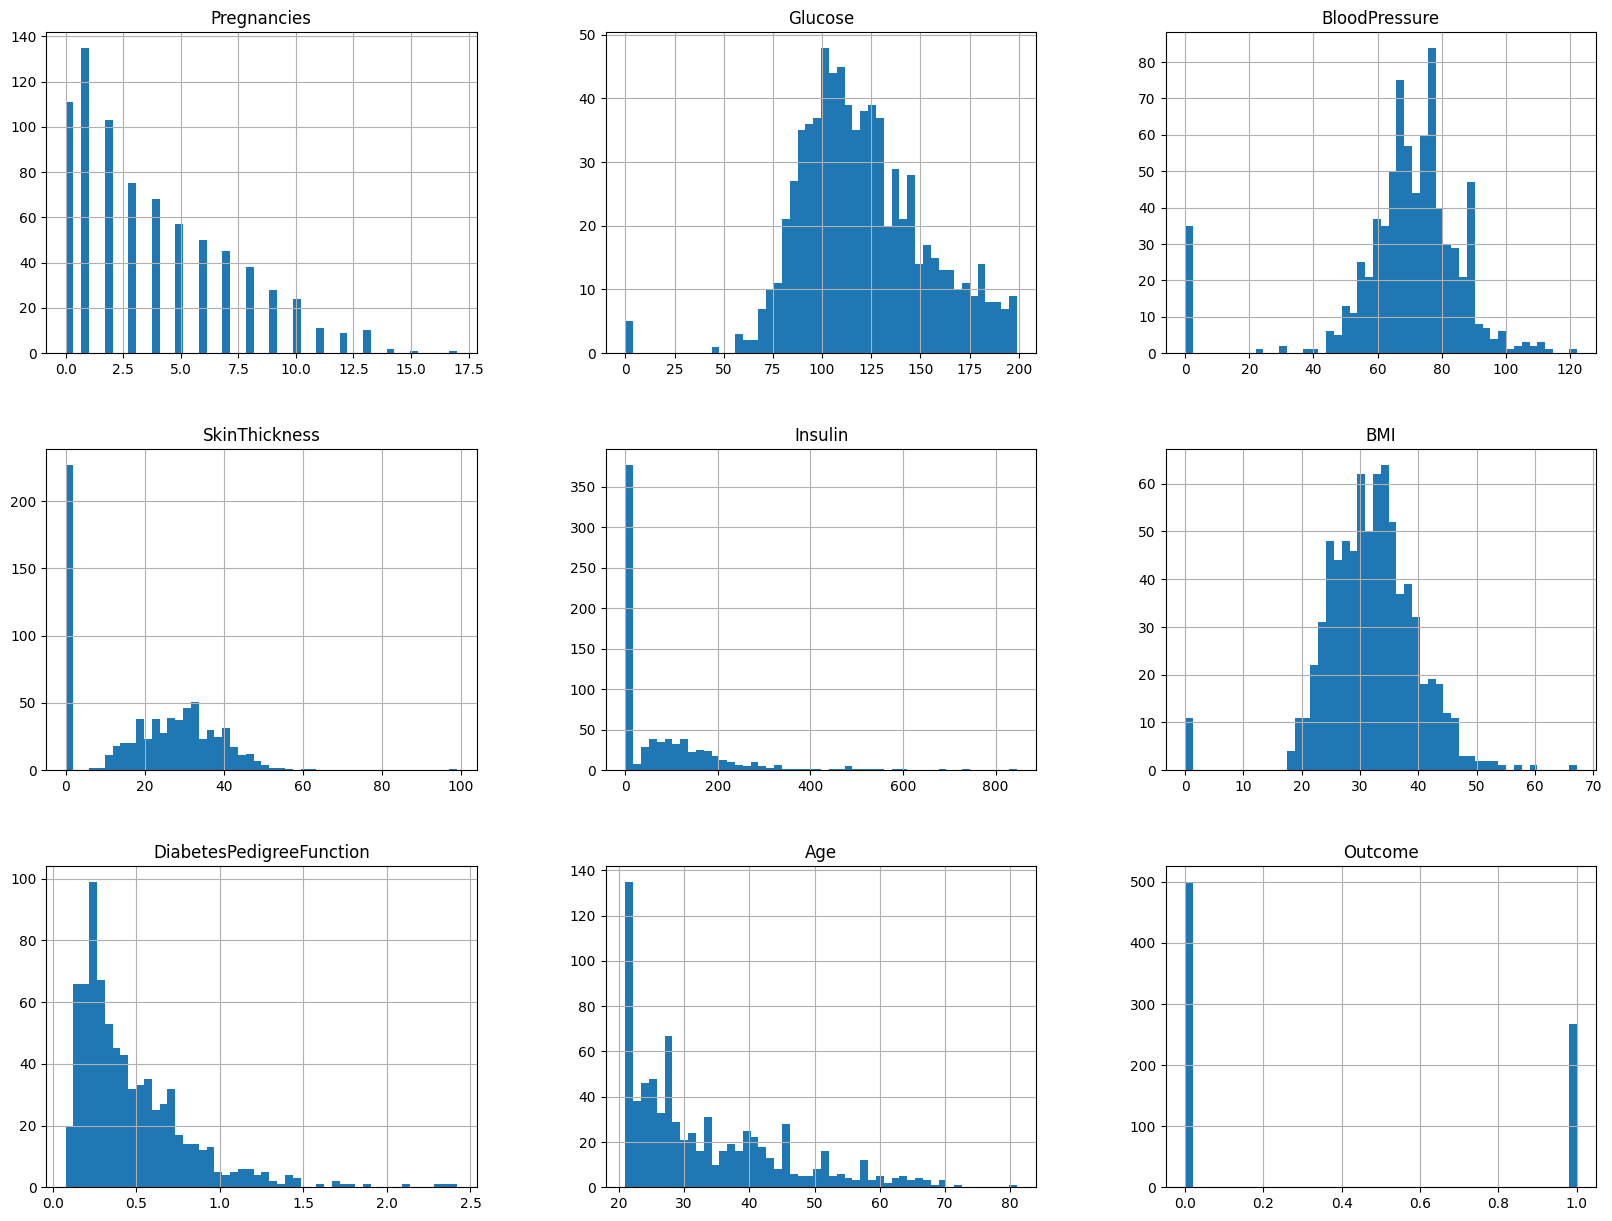

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Gambar di atas menunjukkan histogram dari setiap fitur dalam dataset, informasi yang dapat dilihat:

- Beberapa fitur seperti Insulin dan SkinThickness mengandung banyak nilai nol yang mencurigakan.
- BMI dan Glucose menunjukkan distribusi yang cukup normal, namun mayoritas pasien memiliki BMI tinggi.
- Outcome menunjukkan distribusi kelas yang tidak seimbang, dengan lebih banyak pasien non-diabetik.

### **Pairplot antar Fitur pada Dataset Diabetes**

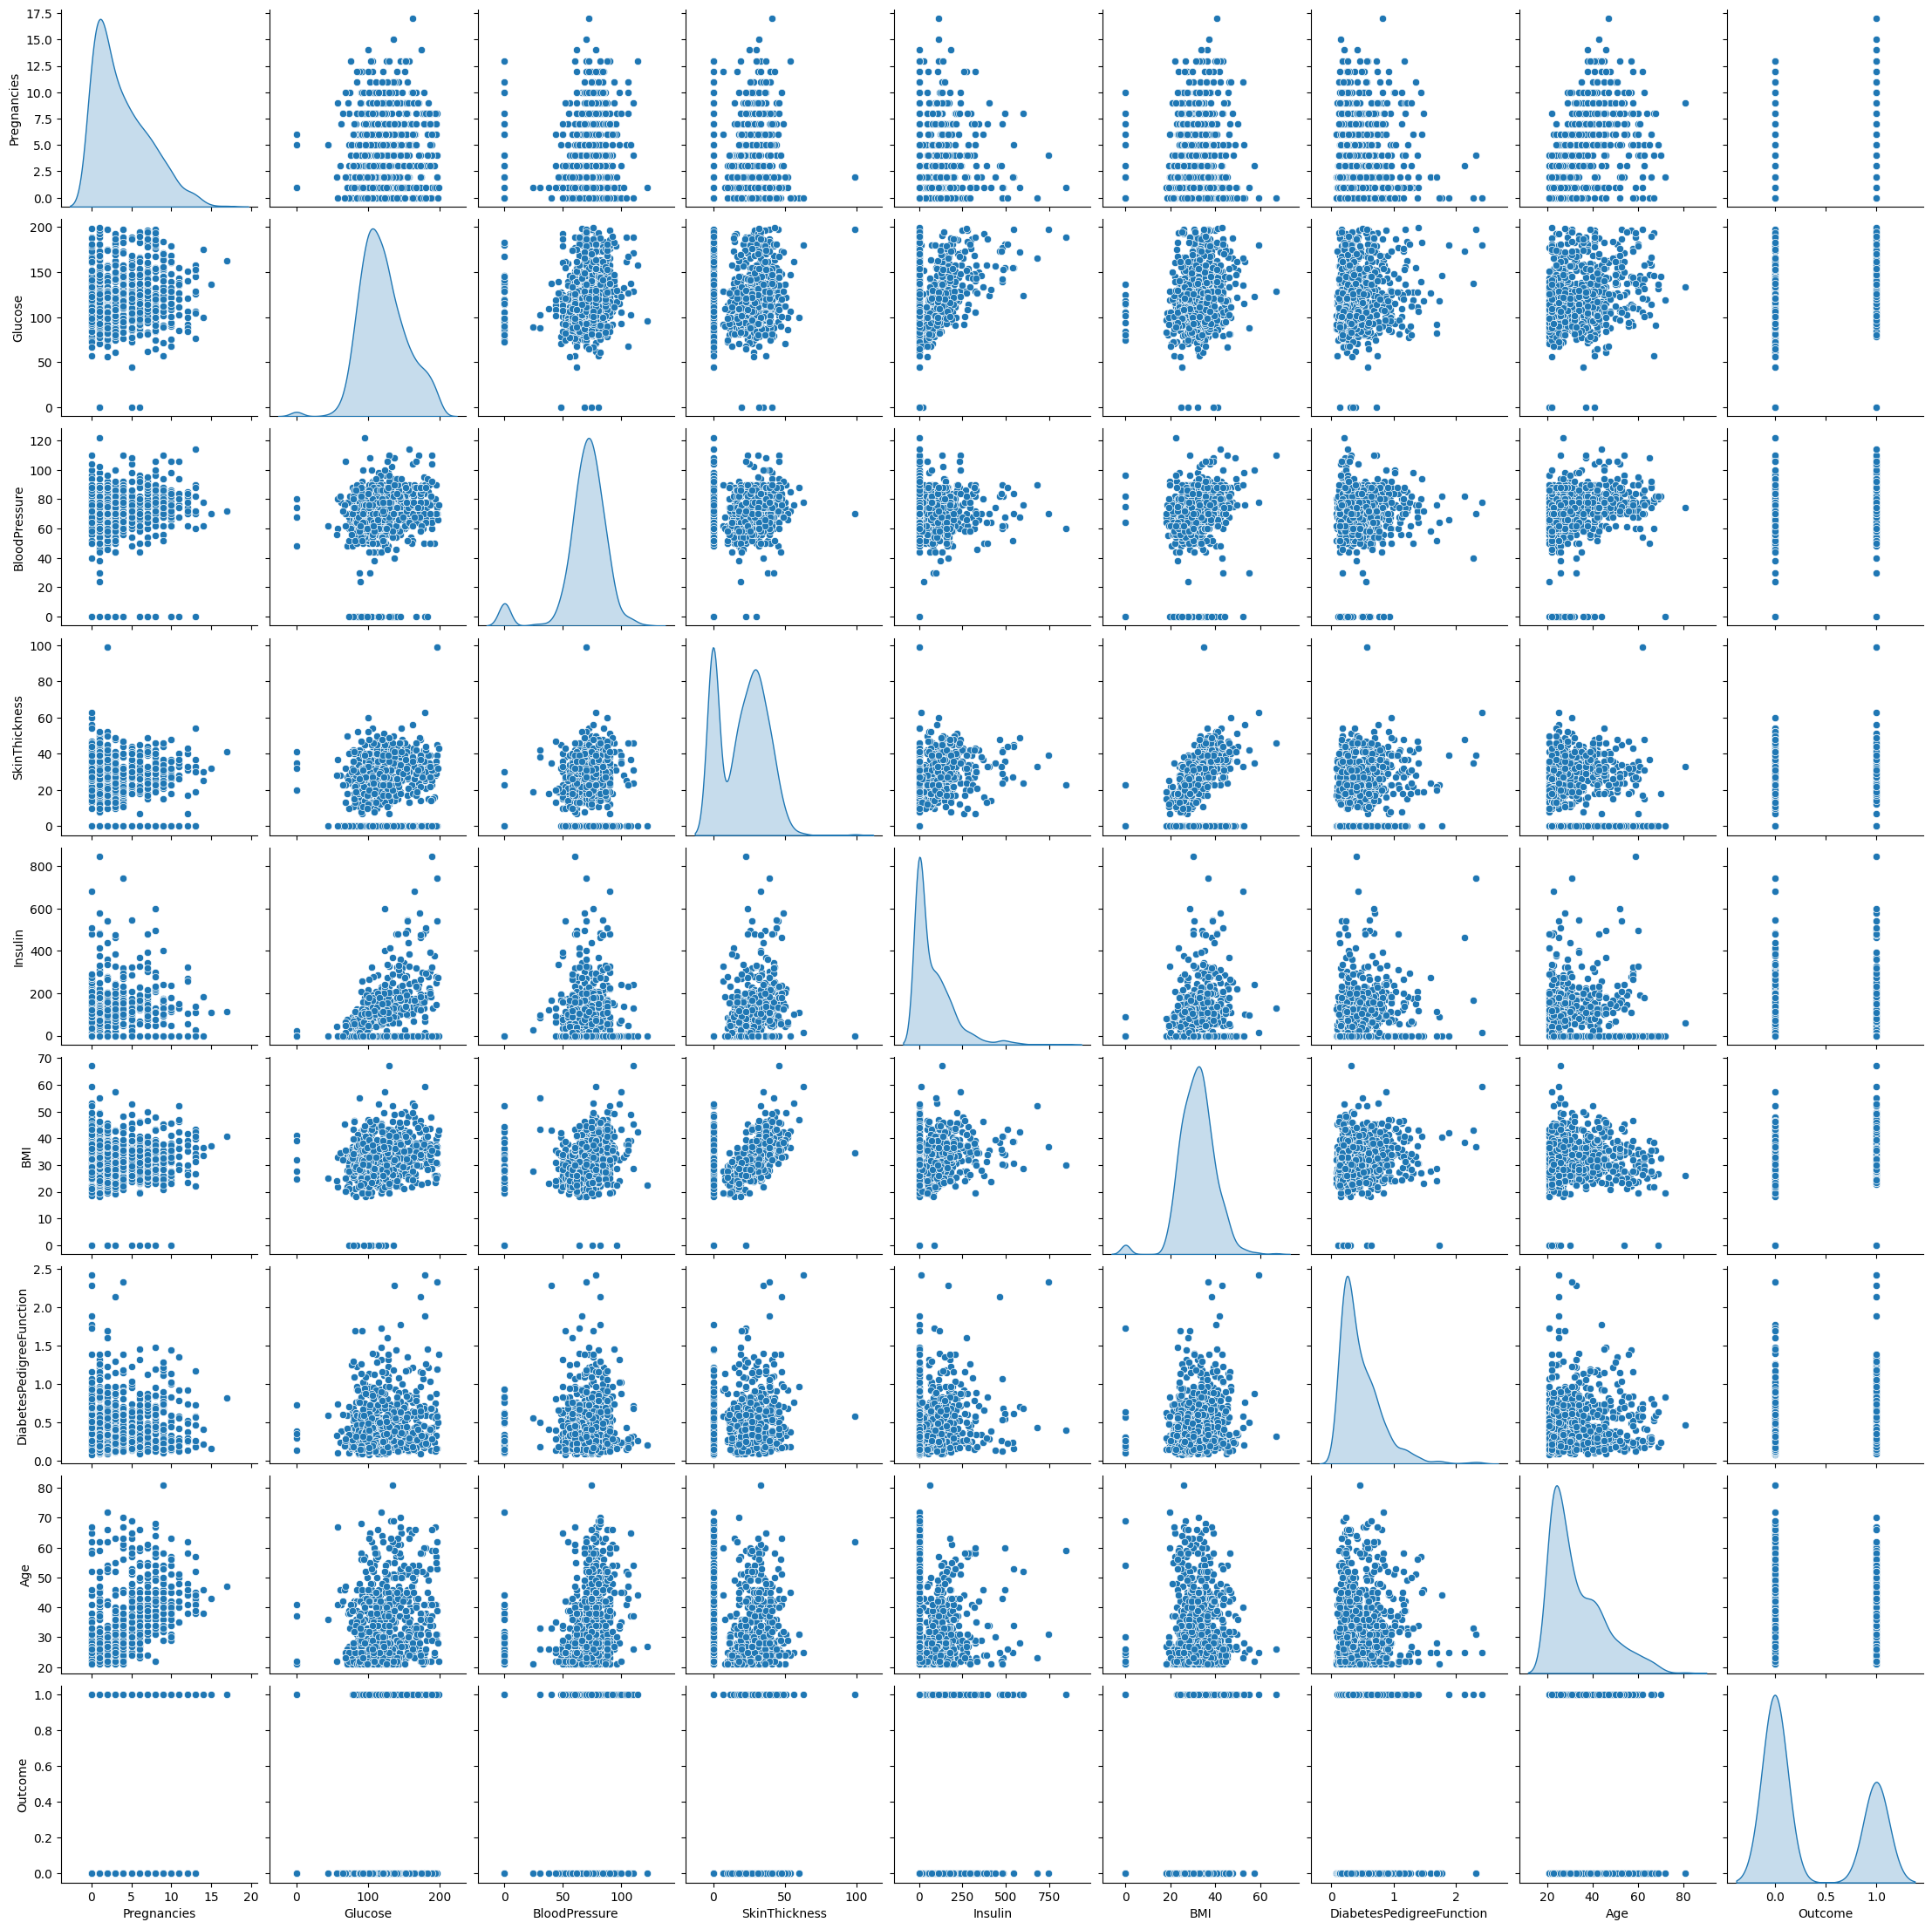

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Gambar di atas menunjukan pairplot hubungan antara fitur-fitur dalam, informasi yang dapat dilihat:

- Glucose menunjukkan pemisahan yang cukup jelas antara pasien diabetes (Outcome=1) dan non-diabetes (Outcome=0). Kadar glukosa yang lebih tinggi cenderung dikaitkan dengan risiko diabetes.
- BMI (Body Mass Index) juga memiliki pola distribusi yang serupa, di mana pasien dengan nilai BMI lebih tinggi cenderung positif diabetes.
- Age memiliki korelasi moderat dengan Outcome, menunjukkan bahwa usia lebih tua cenderung berhubungan dengan peningkatan risiko.
- Korelasi antar fitur terlihat antara:
    - Glucose dan Insulin
    - BMI dan SkinThickness Korelasi ini ditunjukkan dengan pola menyudut pada scatterplot.
- Beberapa fitur seperti BloodPressure dan DiabetesPedigreeFunction tampak tidak memiliki hubungan yang kuat terhadap Outcome.

### **Correlation Matrix pada antar Fitur pada Dataset Diabetes**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

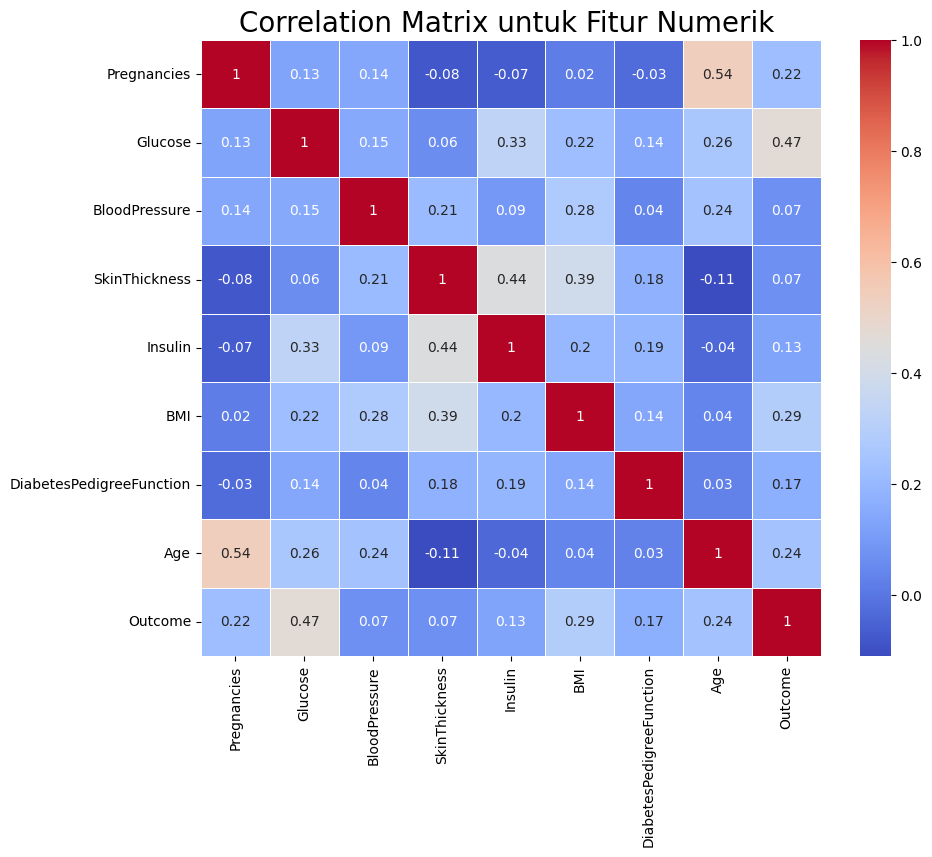

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**insight:**
1. Korelasi terhadap Outcome

| Fitur                            | Korelasi dengan `Outcome` | Interpretasi                                                                   |
| -------------------------------- | ------------------------- | ------------------------------------------------------------------------------ |
| **Glucose**                      | **0.47**                  | Korelasi tertinggi → Semakin tinggi glukosa, semakin tinggi risiko diabetes |
| **BMI**                          | 0.29                      | Korelasi sedang → Obesitas berkontribusi terhadap risiko diabetes              |
| **Age**                          | 0.24                      | Semakin tua, risiko sedikit meningkat                                          |
| **Pregnancies**                  | 0.22                      | Wanita dengan lebih banyak kehamilan cenderung punya risiko lebih tinggi       |
| **DiabetesPedigreeFunction**     | 0.17                      | Ada pengaruh genetik, meskipun tidak terlalu kuat                              |
| **Insulin**                      | 0.13                      | Korelasi lemah, kemungkinan terpengaruh oleh banyak nilai nol                  |
| **BloodPressure, SkinThickness** | < 0.1                     | Korelasi sangat rendah → pengaruh terhadap diabetes lemah                      |


2. Korelasi antar Fitur

| Fitur 1           | Fitur 2           | Korelasi | Insight                                                                   |
| ----------------- | ----------------- | -------- | ------------------------------------------------------------------------- |
| **SkinThickness** | **Insulin**       | **0.44** | Cukup berkorelasi → menunjukkan hubungan biologis terkait metabolisme     |
| **BMI**           | **SkinThickness** | 0.39     | Individu dengan BMI lebih tinggi cenderung memiliki kulit lebih tebal     |
| **Glucose**       | **Insulin**       | 0.33     | Masuk akal, karena insulin berperan dalam regulasi glukosa                |
| **Pregnancies**   | **Age**           | **0.54** | Semakin tua, semakin banyak kemungkinan kehamilan (logis secara biologis) |


# **Data Preparation**

## **1. Data Cleaning**

### **Missing Values dan Duplicated**

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**insight:**

Tidak terdapat missing values di dataset ini.

In [ ]:
df.duplicated().sum()

np.int64(0)

**insight:**

Tidak terdapat duplikasi data di dataset ini.

### **Outlier**

In [ ]:
#Cek data outlier
selected_cols = df

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

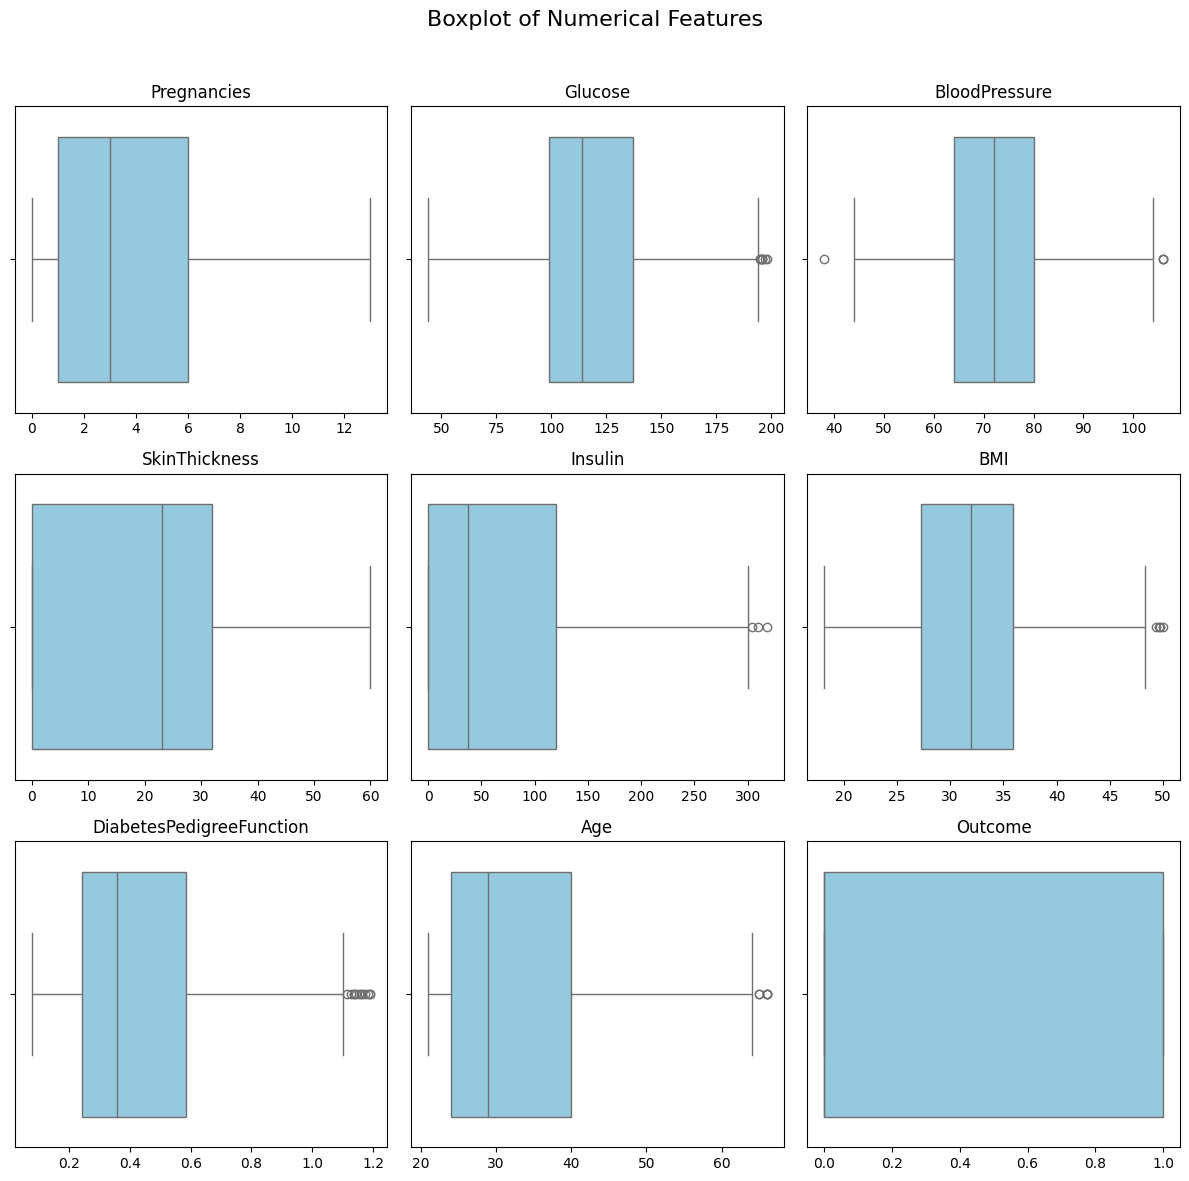

In [ ]:
# Buat grid 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.suptitle('Boxplot of Numerical Features', fontsize=16)

# Flatten axes supaya bisa di-loop
axes = axes.flatten()

# Loop fitur dan plot
for i, feature in enumerate(selected_cols):
    sns.boxplot(data=df_filtered, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Sembunyikan subplot yang tidak dipakai (jika jumlah fitur < jumlah grid)
for j in range(len(selected_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Agar tidak ketimpa judul
plt.show()

Terlihat ada variabel yang terdapat oulier, saya akan menghapus oulier tersebut.

In [ ]:
# Mengganti Nilai Outlier dengan Batas Atas dan Batas Bawah Data

for i in df_filtered.select_dtypes(include='number'):
    Q1 = df_filtered[i].quantile(0.25)
    Q3 = df_filtered[i].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    df_filtered[i] = df_filtered[i].mask(df_filtered[i] > maximum, maximum)
    df_filtered[i] = df_filtered[i].mask(df_filtered[i] < minimum, minimum)

<ipython-input-207-92f69dc51060>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[i] = df_filtered[i].mask(df_filtered[i] > maximum, maximum)
<ipython-input-207-92f69dc51060>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[i] = df_filtered[i].mask(df_filtered[i] < minimum, minimum)
<ipython-input-207-92f69dc51060>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

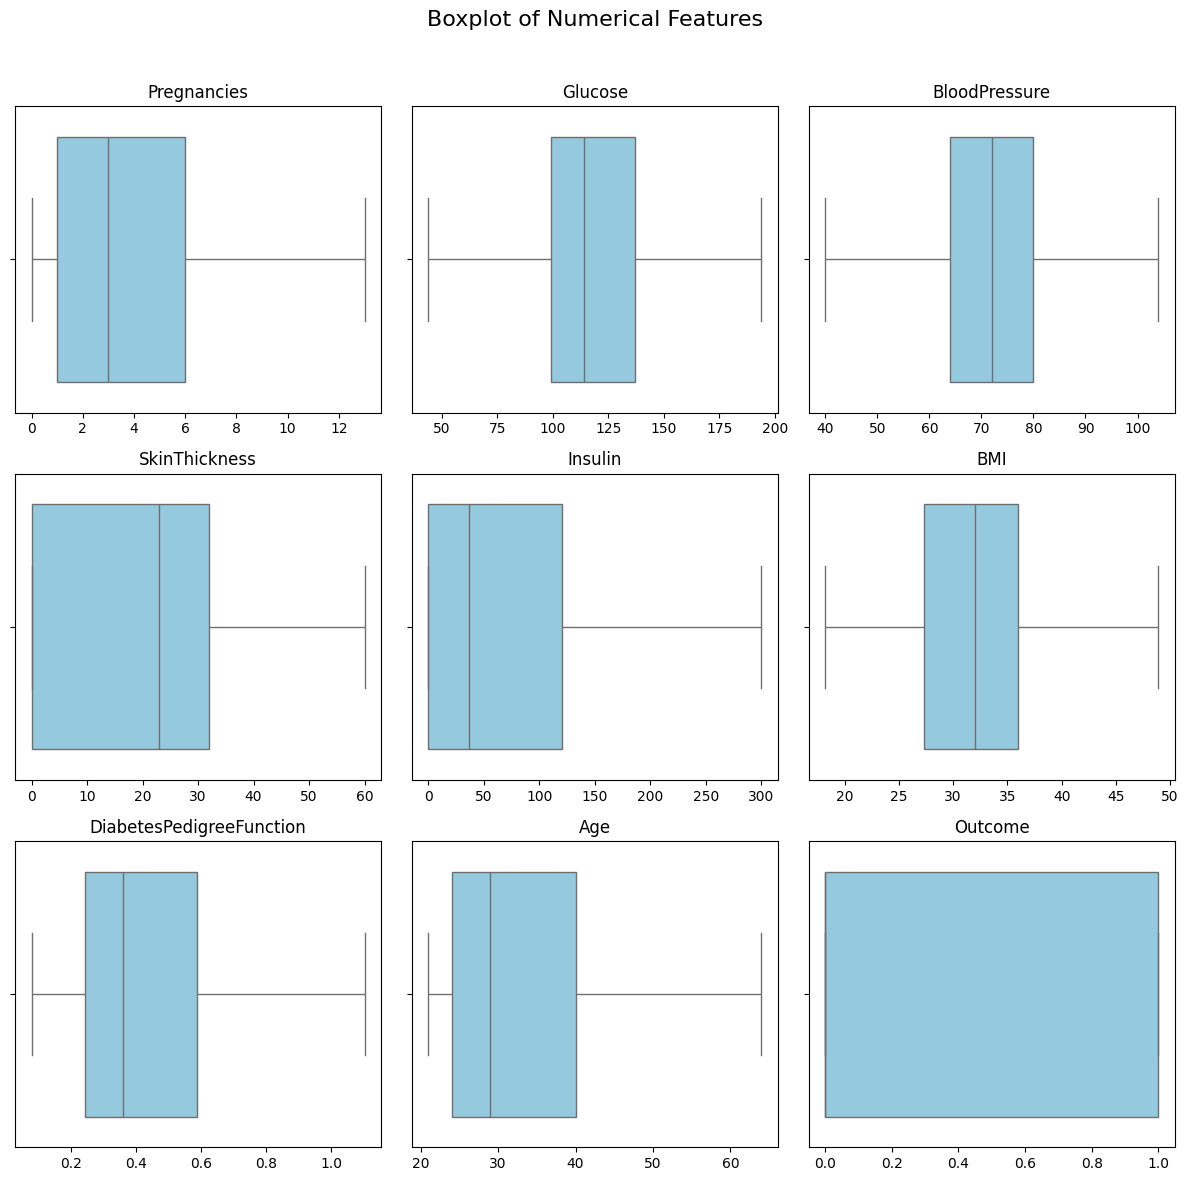

In [ ]:
# Buat grid 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.suptitle('Boxplot of Numerical Features', fontsize=16)

# Flatten axes supaya bisa di-loop
axes = axes.flatten()

# Loop fitur dan plot
for i, feature in enumerate(selected_cols):
    sns.boxplot(data=df_filtered, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Sembunyikan subplot yang tidak dipakai (jika jumlah fitur < jumlah grid)
for j in range(len(selected_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Agar tidak ketimpa judul
plt.show()

Oulier sudah tidak terdapat pada dataset ini.

In [ ]:
df_filtered.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,3.804382,119.089202,72.114241,20.563380,65.881064,32.001252,0.428166,32.699531,0.312989
std,3.260995,29.100677,11.312230,15.339991,79.417442,6.421717,0.248094,11.035019,0.464073
min,0.000000,44.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.000000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.950000,0.586000,40.000000,1.000000
max,13.000000,194.000000,104.000000,60.000000,300.000000,48.925000,1.102000,64.000000,1.000000


**insight:**

Perbandingan Statistik Deskriptif (Sebelum vs Setelah)

| Fitur             | Mean Sebelum | Mean Sesudah | Perbedaan                                                                    |
| ----------------- | ------------ | ------------ | --------------------------------------------------------------------------------------- |
| **Glucose**       | 120.89       | **119.09**   | Rata-rata turun → nilai ekstrem (0 atau tinggi) dihilangkan                             |
| **BloodPressure** | 69.10        | **72.11**    | Rata-rata naik → nilai nol dihapus, jadi hasil lebih realistis                          |
| **Insulin**       | 79.79        | **65.88**    | Rata-rata turun signifikan → banyak outlier tinggi dihilangkan                          |
| **BMI**           | 31.99        | **32.00**    | Hampir tidak berubah → distribusinya cukup stabil                                       |
| **Age**           | 33.24        | **32.69**    | Sedikit turun → kemungkinan outlier adalah pasien usia sangat lanjut (mis. 81 tahun)    |
| **Outcome**       | 0.35         | **0.31**     | Proporsi pasien dengan diabetes sedikit **berkurang** → outlier mungkin dominan positif |

**Kesimpulan:**
1. Data menjadi lebih representatif secara statistik:
  - Distribusi Glucose, BloodPressure, dan Insulin jadi lebih realistis (tidak bias oleh nol atau outlier ekstrem).
  - Mean dan standard deviation lebih seimbang, mencerminkan populasi umum pasien.
2. Distribusi target (Outcome) menjadi lebih seimbang:
  - Penurunan dari 34.9% ke 31.3% menunjukkan bahwa sebagian outlier (kemungkinan dengan nilai ekstrem glukosa/insulin) merupakan penderita diabetes.
3. Jumlah sampel berkurang dari 768 → 639 data:
  - Artinya sekitar 17% data adalah outlier, jadi filtering cukup signifikan.


## **2. Train Test Split**
Train Test Split adalah teknik untuk membagi data menjadi data latih dan data uji. Data latih digunakan untuk melatih model, sementara data uji digunakan untuk mengukur performa model pada data baru.

In [ ]:
# Membentuk variabel X sebagai pengaruh dari target
X = df_filtered.drop(['Outcome'], axis=1)
# Membentuk variabel y sebagai target
y = df_filtered['Outcome']

# Membentuk data training dan data testing dengan komposisi 80% : 20 % dan dirandom setiap dijalankan ulang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [ ]:
# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (511, 8)
Ukuran X_test:  (128, 8)
Ukuran y_train:  (511,)
Ukuran y_test:  (128,)


In [ ]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 639
Total of sample in train dataset: 511
Total of sample in test dataset: 128


**insight:**
1. Tidak ada data yang hilang dalam proses split
  - Total 511 + 128 = 639 → sesuai dengan jumlah total data setelah filtering (tanpa outlier).

2. Jumlah fitur = 8
  - X memiliki 8 kolom (fitur numerik selain 'Outcome'.

3. Langkah ini memastikan generalisasi model
  - Model tidak hanya "hafal" data latih, tapi juga diuji terhadap data baru yang tidak dilihat sebelumnya.

Tujuan Train-Test Split
- Memisahkan dataset df_filtered menjadi data latih (train) dan data uji (test).

- Komposisi: 80% untuk melatih model (train) dan 20% untuk menguji performa (test).

- random_state=30 digunakan agar pembagian data konsisten saat dijalankan ulang.

## **4. Standarisasi/Normalisasi**
**Tujuan Normalisasi**

Menyamakan skala fitur
- Supaya fitur dengan skala besar (Insulin atau Glucose) tidak mendominasi fitur lain seperti BMI atau Age dalam proses training model.

Meningkatkan kinerja algoritma ML
- Algoritma seperti K-Nearest Neighbors (KNN), SVM, dan Logistic Regression sensitif terhadap skala data. Tanpa normalisasi, performa model bisa menurun.

Mempercepat proses training
- Karena perhitungan gradien atau jarak antar data menjadi lebih stabil dan efisien.

In [ ]:
# scaling untuk data training
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train)
X_train[X_train.columns].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
282,0.538462,0.557971,0.75000,0.250000,0.516667,0.462164,0.179688,0.372093
180,0.461538,0.224638,0.62500,0.000000,0.000000,0.162734,0.005859,0.255814
649,0.000000,0.369565,0.31250,0.416667,0.000000,0.266884,0.053711,0.046512
89,0.076923,0.369565,0.43750,0.316667,0.000000,0.270138,0.084961,0.069767
275,0.153846,0.318841,0.46875,0.866667,0.190000,0.725793,0.584961,0.093023


In [ ]:
# scaling untuk data testing
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test[X_test.columns] = scaler.transform(X_test)
X_test[X_test.columns].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
244,0.153846,0.684564,0.666667,0.648148,0.666667,0.673401,0.237673,0.190476
403,0.692308,0.187919,0.708333,0.462963,0.000000,0.451178,0.189349,0.404762
528,0.000000,0.489933,0.458333,0.574074,0.646048,0.424242,0.399408,0.023810
237,0.000000,0.906040,0.958333,0.500000,0.000000,0.872054,0.589744,0.047619
624,0.153846,0.429530,0.416667,0.000000,0.000000,0.424242,0.069034,0.000000


**insight:**
- Tidak ada lagi fitur yang dominasinya terlalu besar (Insulin atau Age yang sebelumnya punya nilai jauh lebih tinggi dari fitur lain).
- Model yang dilatih menggunakan data ini akan lebih stabil, cepat dilatih, dan hasil evaluasi lebih valid.

# **5. Modelling**

In [ ]:
df_filtered['Outcome'].unique()

array([1, 0])

In [ ]:
def modelling(y_true, y_pred, title, target_names=None):
    if target_names is None:
        target_names = ['Non-Diabetic', 'Diabetic']

    # Classification report pakai target_names (label string)
    print(classification_report(y_true, y_pred, target_names=target_names))

    # Plot confusion matrix dengan labels string
    fig, ax = plt.subplots(figsize=(10, 5))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax, display_labels=target_names)

    ax.grid(False)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

Seluruh model yang akan dibuat menggunakan hyperparameter tuning menggunakan optuna. Optimasi hyperparameter dengan Optuna terbukti efektif dalam meningkatkan performa model untuk mengetahui parameter yang tepat untuk algoritma model pada setiap model

## **Model Development dengan K-Nearest Neighbor (KNN)**

[I 2025-05-24 20:06:21,138] A new study created in memory with name: no-name-315f4c91-fb62-47e3-ab77-a0bf5ed28ed5
[I 2025-05-24 20:06:21,152] Trial 0 finished with value: 0.78125 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 0 with value: 0.78125.
[I 2025-05-24 20:06:21,167] Trial 1 finished with value: 0.7734375 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'algorithm': 'brute'}. Best is trial 0 with value: 0.78125.
[I 2025-05-24 20:06:21,186] Trial 2 finished with value: 0.796875 and parameters: {'n_neighbors': 21, 'weights': 'uniform', 'algorithm': 'ball_tree'}. Best is trial 2 with value: 0.796875.
[I 2025-05-24 20:06:21,228] Trial 3 finished with value: 0.796875 and parameters: {'n_neighbors': 28, 'weights': 'uniform', 'algorithm': 'kd_tree'}. Best is trial 2 with value: 0.796875.
[I 2025-05-24 20:06:21,258] Trial 4 finished with value: 0.8046875 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'algorithm'

Best hyperparameters: {'n_neighbors': 29, 'weights': 'uniform', 'algorithm': 'kd_tree'}
              precision    recall  f1-score   support

Non-Diabetic       0.86      0.89      0.88        94
    Diabetic       0.67      0.59      0.62        34

    accuracy                           0.81       128
   macro avg       0.76      0.74      0.75       128
weighted avg       0.81      0.81      0.81       128



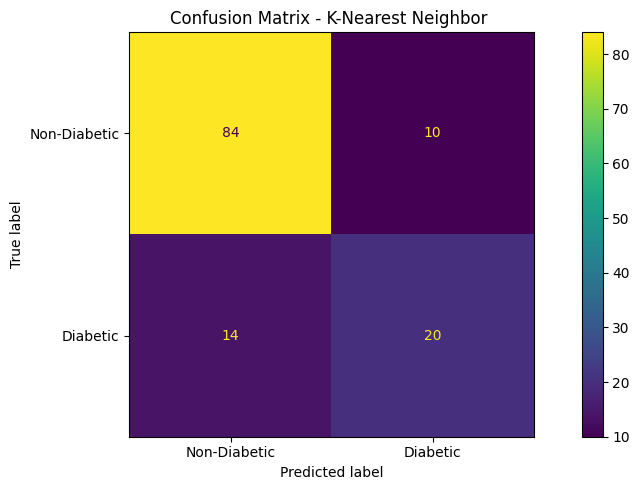

In [ ]:
def objective(trial):
    # Tentukan nilai hyperparameter yang akan dicoba oleh Optuna
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])

    # Buat model KNN dengan
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
    model.fit(X_train, y_train)  # Latih model pada data training
    y_pred = model.predict(X_test)  # Prediksi pada data testing
    return accuracy_score(y_test, y_pred)  # Kembalikan nilai akurasi sebagai metrik evaluasi

# Step 1: Jalankan tuning Optuna untuk mencari kombinasi hyperparameter terbaik
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Step 2: Tampilkan hasil hyperparameter terbaik dari proses tuning
print("Best hyperparameters:", study.best_params)

# Step 3: Buat model KNN baru dengan hyperparameter terbaik
best_knn = KNeighborsClassifier(**study.best_params)
best_knn.fit(X_train, y_train)  # Latih model pada data training

# Step 4: Lakukan prediksi pada data testing menggunakan model terbaik
y_pred_knn = best_knn.predict(X_test)

# Step 5: Evaluasi hasil prediksi menggunakan fungsi modelling
modelling(y_test, y_pred_knn, title="Confusion Matrix - K-Nearest Neighbor ")

|                          | Predicted: Non-Diabetic | Predicted: Diabetic |
| ------------------------ | ----------------------- | ------------------- |
| **Actual: Non-Diabetic** | 84 (True Negative)      | 10 (False Positive) |
| **Actual: Diabetic**     | 14 (False Negative)     | 20 (True Positive)  |

Penjelasan:
- True Negative (TN) = 84 → Non-diabetik yang diprediksi benar sebagai non-diabetik.

- False Positive (FP) = 10 → Non-diabetik yang salah diprediksi sebagai diabetik.

- False Negative (FN) = 14 → Diabetik yang salah diprediksi sebagai non-diabetik.

- True Positive (TP) = 20 → Diabetik yang diprediksi benar sebagai diabetik.

## **Model Development dengan Random Forest**

[I 2025-05-24 20:06:23,393] A new study created in memory with name: no-name-e8994a2d-607d-4c1a-b2db-b95581ed926a
[I 2025-05-24 20:06:24,655] Trial 0 finished with value: 0.7734375 and parameters: {'n_estimators': 126, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.7734375.
[I 2025-05-24 20:06:26,317] Trial 1 finished with value: 0.7578125 and parameters: {'n_estimators': 164, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.7734375.
[I 2025-05-24 20:06:26,682] Trial 2 finished with value: 0.734375 and parameters: {'n_estimators': 51, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.7734375.
[I 2025-05-24 20:06:27,427] Trial 3 finished with value: 0.765625 and parameters: {'n_estimators': 180, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt

Best RF Params: {'n_estimators': 148, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2'}
              precision    recall  f1-score   support

Non-Diabetic       0.85      0.87      0.86        94
    Diabetic       0.61      0.56      0.58        34

    accuracy                           0.79       128
   macro avg       0.73      0.72      0.72       128
weighted avg       0.78      0.79      0.79       128



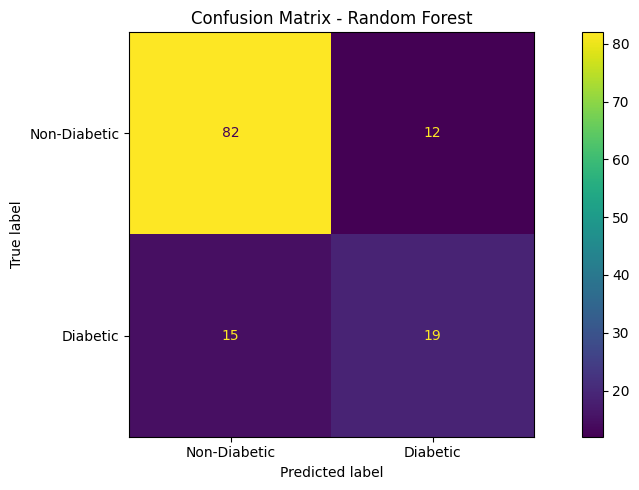

In [ ]:
def rf_objective(trial):
    # Step 1a: Tentukan ruang pencarian hyperparameter yang akan dieksplorasi Optuna
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 42  # Agar hasil tetap konsisten
    }

    # Step 1b: Buat dan latih model Random Forest dengan parameter dari Optuna
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    # Step 1c: Prediksi dan kembalikan akurasi sebagai metrik evaluasi
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Step 2: Jalankan proses tuning dengan Optuna selama 30 percobaan (trials)
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=30)

# Step 3: Cetak kombinasi hyperparameter terbaik hasil tuning
print("Best RF Params:", rf_study.best_params)

# Step 4: Bangun ulang model Random Forest menggunakan hyperparameter terbaik
best_rf = RandomForestClassifier(**rf_study.best_params)
best_rf.fit(X_train, y_train)

# Step 5: Prediksi pada data testing
y_pred_rf = best_rf.predict(X_test)

# Step 6: Evaluasi hasil prediksi menggunakan fungsi modelling
modelling(y_test, y_pred_rf, title="Confusion Matrix - Random Forest")

|                         | Predicted Non-Diabetic | Predicted Diabetic  |
| ----------------------- | ---------------------- | ------------------- |
| **Actual Non-Diabetic** | 83 (True Negative)     | 11 (False Positive) |
| **Actual Diabetic**     | 15 (False Negative)    | 19 (True Positive)  |

Penjelasan:
- True Negative (TN) = 82 → Non-diabetik yang diprediksi benar.

- False Positive (FP) = 12 → Non-diabetik yang salah diprediksi sebagai diabetik.

- False Negative (FN) = 15 → Diabetik yang salah diprediksi sebagai non-diabetik.

- True Positive (TP) = 19 → Diabetik yang diprediksi benar.

## **Model Development dengan Logistic Regression**

[I 2025-05-24 20:06:55,386] A new study created in memory with name: no-name-da00ad69-2c3f-4afa-9fbf-26eb53686cda
<ipython-input-219-c80cedd3a730>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e2),  # Regularisasi
[I 2025-05-24 20:06:55,401] Trial 0 finished with value: 0.734375 and parameters: {'C': 0.002486480485967193, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.734375.
<ipython-input-219-c80cedd3a730>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e2),  # Regularisasi
[I 2025-05-24 20:06:55,417] Trial 1 finished with value: 0.7890625 and parameters: {'

Best LR Params: {'C': 0.18890708835675044, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

Non-Diabetic       0.82      0.95      0.88        94
    Diabetic       0.75      0.44      0.56        34

    accuracy                           0.81       128
   macro avg       0.79      0.69      0.72       128
weighted avg       0.80      0.81      0.79       128



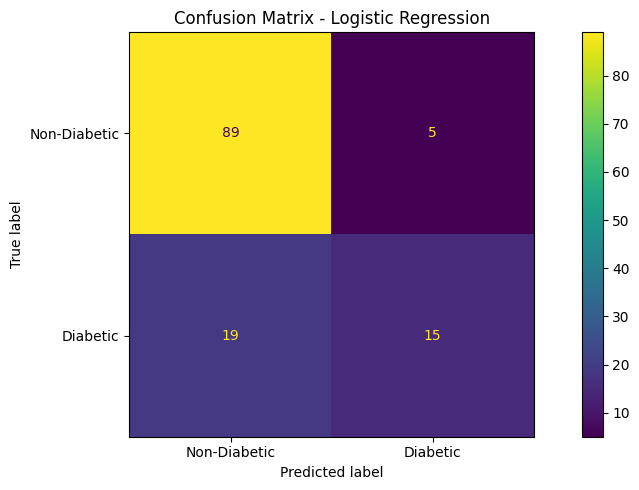

In [ ]:
def lr_objective(trial):
    # Step 1a: Tentukan ruang pencarian hyperparameter
    params = {
        'C': trial.suggest_loguniform('C', 1e-3, 1e2),  # Regularisasi
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),  # Jenis penalti
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),  # Optimizer
        'max_iter': 1000,
        'random_state': 42
    }

    # Step 1b: Tangani kombinasi penalty-solver yang tidak valid
    if params['penalty'] == 'l1' and params['solver'] == 'saga':
        return 0.0  # Kombinasi ini tidak didukung → skor nol

    # Step 1c: Bangun dan latih model Logistic Regression
    model = LogisticRegression(**params)
    model.fit(X_train, y_train)

    # Step 1d: Prediksi dan hitung akurasi
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Step 2: Jalankan tuning Optuna selama 30 percobaan untuk mencari kombinasi terbaik
lr_study = optuna.create_study(direction='maximize')
lr_study.optimize(lr_objective, n_trials=30)

# Step 3: Tampilkan hyperparameter terbaik hasil tuning
print("Best LR Params:", lr_study.best_params)

# Step 4: Bangun ulang model Logistic Regression dengan parameter terbaik
best_lr = LogisticRegression(**lr_study.best_params)
best_lr.fit(X_train, y_train)

# Step 5: Lakukan prediksi pada data uji
y_pred_lr = best_lr.predict(X_test)

# Step 6: Evaluasi hasil prediksi menggunakan fungsi modelling
modelling(y_test, y_pred_lr, title="Confusion Matrix - Logistic Regression")


|                          | Predicted: Non-Diabetic | Predicted: Diabetic |
| ------------------------ | ----------------------- | ------------------- |
| **Actual: Non-Diabetic** | 89 (True Negative)      | 5 (False Positive)  |
| **Actual: Diabetic**     | 19 (False Negative)     | 15 (True Positive)  |

Arti Angka:
- True Negative (TN) = 89 → Non-diabetik diprediksi benar sebagai non-diabetik.

- False Positive (FP) = 5 → Non-diabetik salah diprediksi sebagai diabetik.

- False Negative (FN) = 19 → Diabetik salah diprediksi sebagai non-diabetik.

- True Positive (TP) = 15 → Diabetik diprediksi benar sebagai diabetik.

## **Model Development dengan Catboost**

[I 2025-05-24 20:06:56,494] A new study created in memory with name: no-name-8746721c-e272-4667-89f3-7043d67334e5
[I 2025-05-24 20:06:57,794] Trial 0 finished with value: 0.7578125 and parameters: {'iterations': 245, 'depth': 9, 'learning_rate': 0.040143650099990845, 'l2_leaf_reg': 3.1563600277701633, 'border_count': 108}. Best is trial 0 with value: 0.7578125.
[I 2025-05-24 20:06:58,225] Trial 1 finished with value: 0.75 and parameters: {'iterations': 178, 'depth': 8, 'learning_rate': 0.23156286260375547, 'l2_leaf_reg': 4.704426809652048, 'border_count': 92}. Best is trial 0 with value: 0.7578125.
[I 2025-05-24 20:06:58,475] Trial 2 finished with value: 0.75 and parameters: {'iterations': 187, 'depth': 6, 'learning_rate': 0.05632607766283529, 'l2_leaf_reg': 6.845289087227351, 'border_count': 225}. Best is trial 0 with value: 0.7578125.
[I 2025-05-24 20:06:58,905] Trial 3 finished with value: 0.75 and parameters: {'iterations': 246, 'depth': 6, 'learning_rate': 0.1317982535459322, 'l2_

Best CatBoost Params: {'iterations': 115, 'depth': 9, 'learning_rate': 0.18788678889944563, 'l2_leaf_reg': 1.0539151549123975, 'border_count': 50}
              precision    recall  f1-score   support

Non-Diabetic       0.87      0.79      0.83        94
    Diabetic       0.53      0.68      0.60        34

    accuracy                           0.76       128
   macro avg       0.70      0.73      0.71       128
weighted avg       0.78      0.76      0.77       128



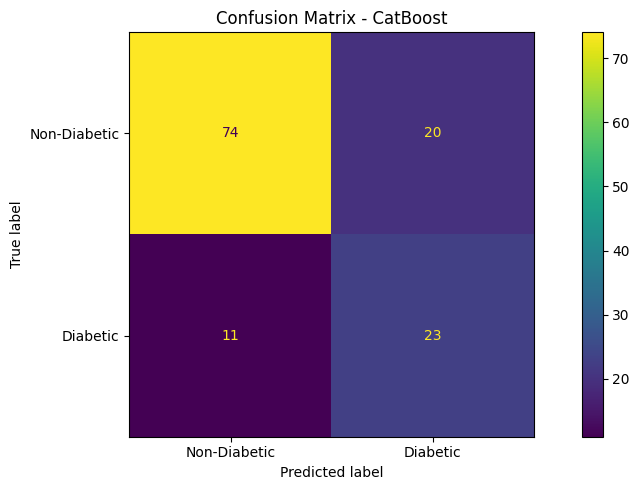

In [ ]:
# Definisikan fungsi objective untuk tuning CatBoostClassifier dengan Optuna
def catboost_objective(trial):
    # Step 1a: Tentukan ruang pencarian hyperparameter
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),  # Jumlah iterasi boosting
        "depth": trial.suggest_int("depth", 4, 10),  # Kedalaman pohon
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),  # Ukuran langkah pembelajaran
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),  # Regularisasi L2
        "border_count": trial.suggest_int("border_count", 32, 255),  # Jumlah batas binning fitur numerik
        "random_state": 42,
        "verbose": 0  # Nonaktifkan output saat training
    }

    # Step 1b: Bangun dan latih model CatBoostClassifier
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)

    # Step 1c: Prediksi dan hitung akurasi
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Step 2: Jalankan tuning hyperparameter dengan Optuna selama 30 percobaan
catboost_study = optuna.create_study(direction='maximize')
catboost_study.optimize(catboost_objective, n_trials=30)

# Step 3: Tampilkan kombinasi hyperparameter terbaik
print("Best CatBoost Params:", catboost_study.best_params)

# Step 4: Bangun ulang model CatBoost dengan parameter terbaik
best_catboost = CatBoostClassifier(**catboost_study.best_params, verbose=0)
best_catboost.fit(X_train, y_train)

# Step 5: Prediksi pada data uji
y_pred_catboost = best_catboost.predict(X_test)

# Step 6: Evaluasi hasil prediksi menggunakan fungsi modelling
modelling(y_test, y_pred_catboost, title="Confusion Matrix - CatBoost")

|                          | Predicted: Non-Diabetic | Predicted: Diabetic |
| ------------------------ | ----------------------- | ------------------- |
| **Actual: Non-Diabetic** | 74 (True Negative)      | 20 (False Positive) |
| **Actual: Diabetic**     | 11 (False Negative)     | 23 (True Positive)  |

Arti:
- True Negative (TN) = 74 → Non-diabetik yang diprediksi dengan benar.

- False Positive (FP) = 20 → Non-diabetik yang salah diprediksi sebagai diabetik.

- False Negative (FN) = 11 → Diabetik yang salah diprediksi sebagai non-diabetik.

- True Positive (TP) = 23 → Diabetik yang diprediksi dengan benar.

| **Model**               | **Kelebihan**                                                                    | **Kekurangan**                                                      |
| ----------------------- | -------------------------------------------------------------------------------- | ------------------------------------------------------------------- |
| **KNN**                 | - Mudah dipahami dan diimplementasikan                                           | - Prediksi lambat pada dataset besar                                |
|                         | - Non-parametrik, tidak membuat asumsi distribusi data                           | - Sensitif terhadap skala fitur (perlu normalisasi)                 |
|                         | - Adaptif terhadap data baru                                                     | - Kinerja menurun pada data berdimensi tinggi                       |
|                         |                                                                                  | - Rentan terhadap noise dan outlier                                 |
| **Random Forest**       | - Akurasi tinggi melalui ensemble learning                                       | - Waktu training dan prediksi lebih lama dibanding model sederhana  |
|                         | - Mengurangi risiko overfitting dari decision tree                               | - Interpretasi model lebih sulit                                    |
|                         | - Dapat menangani data kategorikal dan numerik                                   | - Konsumsi memori dan komputasi tinggi                              |
|                         | - Memberikan feature importance                                                  |                                                                     |
| **Logistic Regression** | - Cepat dan efisien pada dataset besar                                           | - Mengasumsikan hubungan linear antara fitur dan output             |
|                         | - Mudah diinterpretasi (koefisien fitur)                                         | - Tidak fleksibel untuk pola non-linear                             |
|                         | - Memberikan estimasi probabilitas                                               | - Rentan terhadap multikolinearitas                                 |
| **CatBoost**            | - Performa tinggi dan stabil di berbagai jenis data                              | - Lebih kompleks dan butuh tuning                                   |
|                         | - Tangani fitur kategorikal secara otomatis                                      | - Waktu pelatihan lebih lama dibanding logistic regression atau KNN |
|                         | - Mencegah overfitting dengan teknik regularisasi internal                       | - Interpretasi lebih sulit dibanding model linear                   |
|                         | - Efisien dan cepat dibanding gradient boosting lain (seperti XGBoost, LightGBM) |                                                                     |


# **Evaluasi dan Pemilihan Model**

**Perbandingan Model**

| Model             | Accuracy | Recall (Diabetic) | Precision (Diabetic) | F1 (Diabetic) |
| ----------------- | -------- | ----------------- | -------------------- | ------------- |
| **KNN**           | 81%      | 0.59              | 0.67                 | 0.62          |
| **Logistic Reg.** | 81%      | 0.44              | 0.75                 | 0.56          |
| **CatBoost**      | 76%      | 0.68          | 0.53                 | 0.60          |
| **Random Forest** | 79%      | 0.56              | 0.61                 | 0.58          |


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Hitung akurasi masing-masing model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

# Buat DataFrame
models = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "K-Nearest Neighbor", "Catboost"],
    "Akurasi": [accuracy_lr * 100, accuracy_rf * 100, accuracy_knn * 100, accuracy_catboost * 100]
})

# Urutkan berdasarkan akurasi tertinggi ke terendah
models = models.sort_values(by="Akurasi", ascending=False)
models

,Model,Akurasi
0,Logistic Regression,81.25000
2,K-Nearest Neighbor,81.25000
1,Random Forest,78.90625
3,Catboost,75.78125


Model yang terbaik dari urutan akurasi dan f1 score adalah **Algoritma K-Nearest Neighbor (KNN)**. Model KNN akan saya terapkan untuk menjawab masalah yang saya buat.

              precision    recall  f1-score   support

Non-Diabetic       0.86      0.89      0.88        94
    Diabetic       0.67      0.59      0.62        34

    accuracy                           0.81       128
   macro avg       0.76      0.74      0.75       128
weighted avg       0.81      0.81      0.81       128



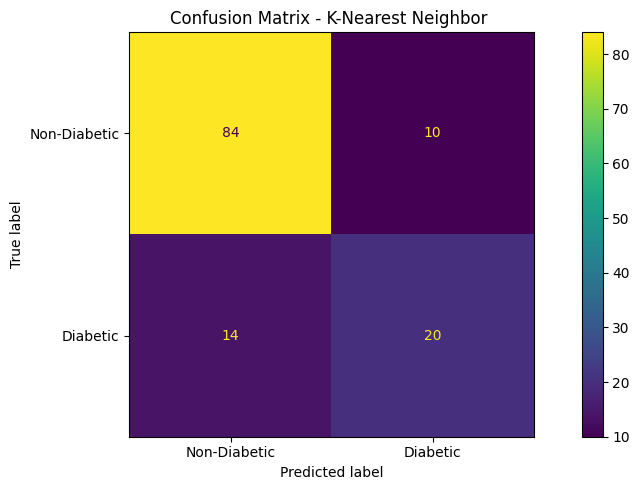

In [ ]:
modelling(y_test, y_pred_knn, title="Confusion Matrix - K-Nearest Neighbor ")

**Mengukur ketepatan prediksi positif Precision, Recall, F1-Score**
1. Precision

            Precision = TP / (TP + FP)
   - Non-Diabetic: 84 / (84 + 14) = 0.86
   - Diabetic: 20 / (20 + 10) = 0.67
2.  Recall (Sensitivity)
            Recall = TP / (TP + FN)
   - Non-Diabetic: 84 / (84 + 10) = 0.89
   - Diabetic: 20 / (20 + 14) = 0.59
3.   F1-Score

            F1-score = 2 x ((Precision x Recall) / (Precision + Recall))

   - Non-Diabetic: 0.88
   - Diabetic: 0.62

**Mengukur Accuracy**

            Accuracy = (TP + TN) / Total = (84 + 20) / 128 = 0.81

# **Solving the Problem**

### **1. Seberapa besar pengaruh kadar glukosa darah dan indeks massa tubuh (BMI) terhadap risiko seseorang menderita diabetes?**

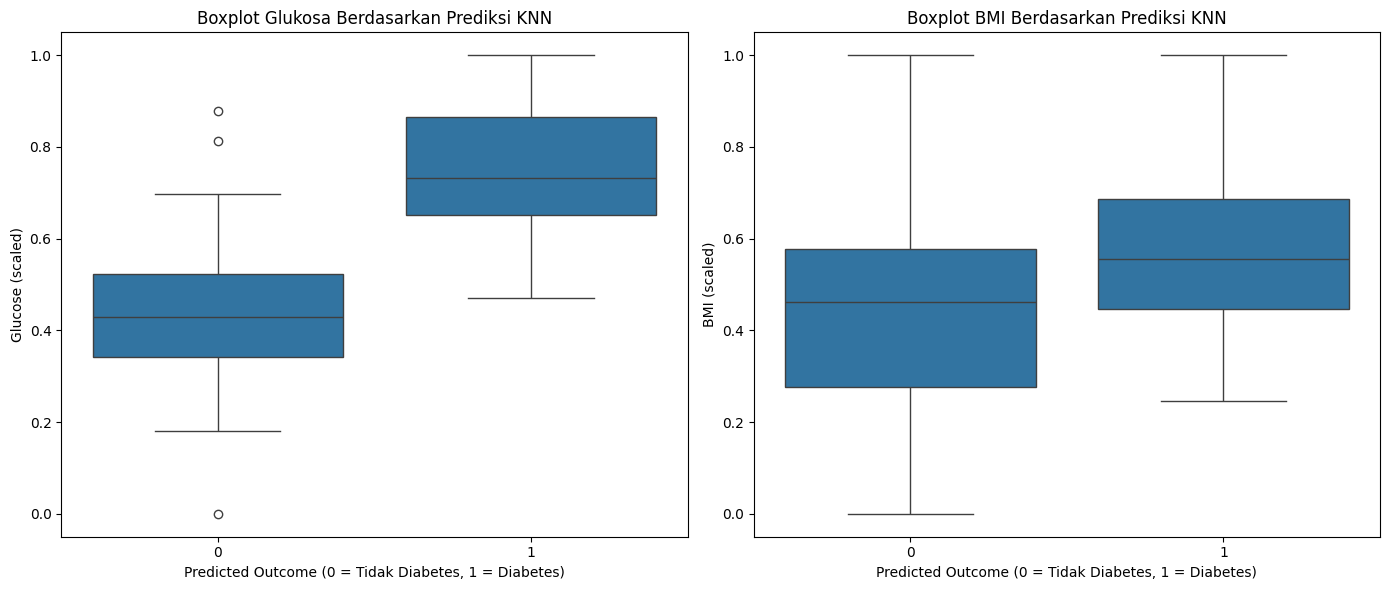

Akurasi model: 0.8125


In [ ]:
# Prediksi pada data testing menggunakan model terbaik
y_pred_best = best_knn.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred_best)

# Gabungkan prediksi dengan data fitur untuk visualisasi
df_test_pred = pd.DataFrame(X_test, columns=["Glucose", "BMI"])
df_test_pred["Predicted_Outcome"] = y_pred_best

# Visualisasi boxplot berdasarkan prediksi model terbaik
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot Glucose
sns.boxplot(data=df_test_pred, x="Predicted_Outcome", y="Glucose", ax=axes[0])
axes[0].set_title("Boxplot Glukosa Berdasarkan Prediksi KNN")
axes[0].set_xlabel("Predicted Outcome (0 = Tidak Diabetes, 1 = Diabetes)")
axes[0].set_ylabel("Glucose (scaled)")

# Boxplot BMI
sns.boxplot(data=df_test_pred, x="Predicted_Outcome", y="BMI", ax=axes[1])
axes[1].set_title("Boxplot BMI Berdasarkan Prediksi KNN")
axes[1].set_xlabel("Predicted Outcome (0 = Tidak Diabetes, 1 = Diabetes)")
axes[1].set_ylabel("BMI (scaled)")

plt.tight_layout()
plt.show()

# Tampilkan akurasi
print("Akurasi model:", accuracy)

**Interpretasi:**
1. Pengaruh Glukosa terhadap Prediksi Risiko Diabetes
  - Boxplot Glukosa menunjukkan perbedaan yang jelas antara pasien yang diprediksi menderita diabetes (Predicted Outcome = 1) dan yang tidak (Predicted Outcome = 0). Nilai median glukosa pada kelompok yang diprediksi diabetes berada pada kisaran yang jauh lebih tinggi dibandingkan kelompok non-diabetes. Selain itu, rentang interkuartil (IQR) pasien diabetes juga bergeser ke arah nilai glukosa yang lebih tinggi. Hal ini menunjukkan bahwa kadar glukosa darah sangat berpengaruh dalam menentukan prediksi risiko diabetes oleh model KNN.
 - **kesimpulan :** Perbedaan ini mengindikasikan bahwa semakin tinggi kadar glukosa seseorang, semakin besar kemungkinan ia diprediksi memiliki diabetes oleh model. Dengan kata lain, glukosa merupakan salah satu fitur paling dominan dalam pengambilan keputusan klasifikasi KNN pada dataset ini.


 2. Pengaruh BMI terhadap Prediksi Risiko Diabetes
  - Distribusi BMI berdasarkan prediksi KNN menunjukkan bahwa pasien yang diprediksi diabetes cenderung memiliki BMI yang sedikit lebih tinggi dibandingkan pasien yang diprediksi tidak diabetes. Meskipun demikian, terdapat tumpang tindih yang cukup besar antara kedua kelompok, terutama pada rentang IQR dan sebaran nilai BMI secara keseluruhan.
  - **kesimpulan :** meskipun BMI turut berkontribusi dalam prediksi risiko diabetes, pengaruhnya tidak sekuat glukosa. BMI lebih bersifat sebagai faktor pendukung, bukan penentu utama dalam keputusan model KNN. Dengan demikian, BMI tetap relevan, tetapi kadar glukosa lebih kuat dalam membedakan risiko diabetes.

### **2. Bagaimana interaksi antara usia, kadar glukosa, dan BMI memengaruhi kemungkinan seseorang menderita diabetes?**



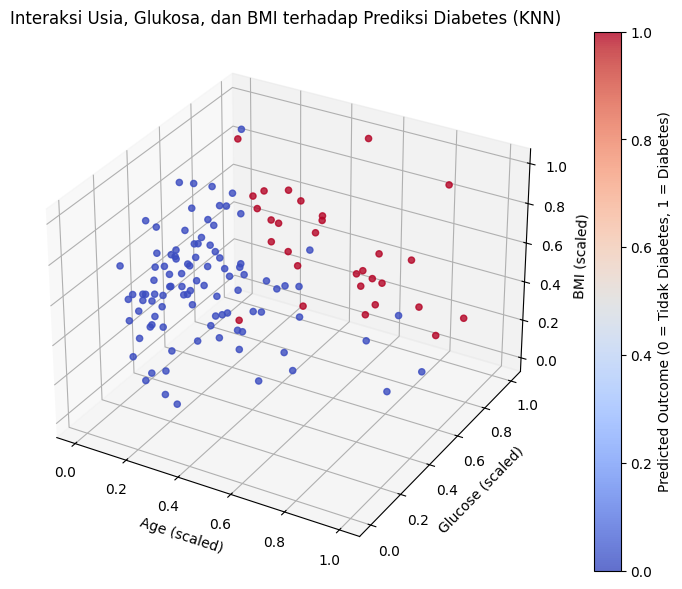

Akurasi model: 0.8125


In [ ]:
# Prediksi menggunakan model KNN terbaik
y_pred_best = best_knn.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred_best)

# Buat DataFrame dengan fitur untuk visualisasi
df_3d_pred = X_test[["Age", "Glucose", "BMI"]].copy()
df_3d_pred["Predicted_Outcome"] = y_pred_best

# Visualisasi 3D: Interaksi Usia, Glukosa, dan BMI
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_3d_pred["Age"],
    df_3d_pred["Glucose"],
    df_3d_pred["BMI"],
    c=df_3d_pred["Predicted_Outcome"],
    cmap="coolwarm",
    alpha=0.8
)

ax.set_title("Interaksi Usia, Glukosa, dan BMI terhadap Prediksi Diabetes (KNN)")
ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Glucose (scaled)")
ax.set_zlabel("BMI (scaled)")

plt.colorbar(scatter, label="Predicted Outcome (0 = Tidak Diabetes, 1 = Diabetes)")
plt.show()

# Tampilkan akurasi model
print("Akurasi model:", round(accuracy, 4))

**intepretasi:**

Dari visualisasi 3D di atas, dapat dilihat bahwa individu dengan kadar glukosa tinggi (di atas 120 dalam skala standar) dan BMI yang tinggi (sekitar 35 ke atas) lebih banyak diprediksi menderita diabetes (ditunjukkan oleh titik-titik berwarna merah). Ini menunjukkan bahwa kadar glukosa dan BMI memiliki kontribusi signifikan terhadap peningkatan risiko diabetes.

Selain itu, usia juga tampak berperan, walaupun tidak sekuat glukosa dan BMI. Individu dengan usia lebih tua yang juga memiliki glukosa dan BMI tinggi cenderung lebih banyak terklasifikasi sebagai penderita diabetes. Namun, pada individu dengan usia muda, meskipun BMI tinggi, jika glukosa rendah, kemungkinan besar diprediksi tidak menderita diabetes.

Dengan akurasi model sebesar 81.125%, dapat disimpulkan bahwa model KNN mampu mengenali pola keterkaitan antara kombinasi usia, kadar glukosa, dan BMI terhadap risiko diabetes secara cukup baik. Visualisasi ini menguatkan bahwa kadar glukosa dan BMI adalah dua variabel yang sangat memengaruhi hasil prediksi diabetes, dengan usia berperan sebagai faktor pendukung.

### **3. Apakah kombinasi kadar glukosa dan riwayat keluarga (Diabetes Pedigree Function) dapat digunakan untuk memprediksi diabetes secara akurat?**

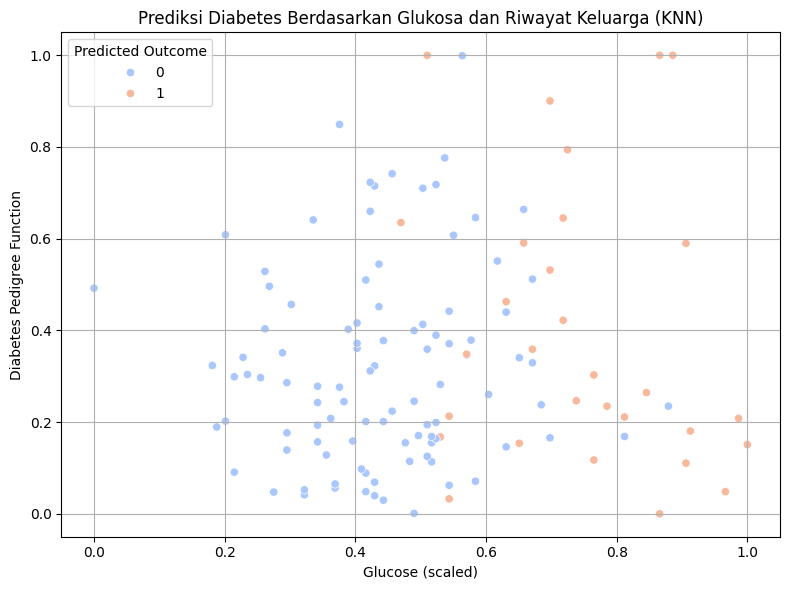

Akurasi model: 0.8125


In [ ]:
# Prediksi pada data testing menggunakan model terbaik
y_pred_best = best_knn.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred_best)

# Gabungkan prediksi dengan data fitur untuk visualisasi
df_test_pred = pd.DataFrame(X_test, columns=["Glucose", "DiabetesPedigreeFunction"])
df_test_pred["Predicted_Outcome"] = y_pred_best

# Visualisasi scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_test_pred, x="Glucose", y="DiabetesPedigreeFunction", hue="Predicted_Outcome", palette="coolwarm")
plt.title("Prediksi Diabetes Berdasarkan Glukosa dan Riwayat Keluarga (KNN)")
plt.xlabel("Glucose (scaled)")
plt.ylabel("Diabetes Pedigree Function")
plt.legend(title="Predicted Outcome")
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan akurasi
print("Akurasi model:", accuracy)

**Interpretasi:**

**Kadar glukosa tinggi berkorelasi kuat dengan prediksi diabetes**
Titik berwarna merah (Predicted Outcome = 1) cenderung terkonsentrasi di sisi kanan grafik, yaitu pada kadar glukosa yang tinggi (sekitar di atas 130). Ini menunjukkan bahwa semakin tinggi kadar glukosa seseorang, semakin besar kemungkinan model memprediksi bahwa orang tersebut menderita diabetes.

**Riwayat keluarga (DPF) tidak terlalu dominan sebagai faktor prediksi tunggal**
Titik merah dan biru tersebar di berbagai nilai DPF, baik rendah maupun tinggi. Ini berarti bahwa DPF sendiri kurang memberikan perbedaan yang jelas dalam prediksi outcome, kecuali bila dikombinasikan dengan glukosa tinggi.

**Interaksi glukosa & DPF memberi gambaran yang lebih lengkap**
Meskipun DPF tidak terlalu dominan sendiri, ketika digabungkan dengan glukosa tinggi, prediksi diabetes menjadi lebih kuat. Contohnya: di area kanan bawah (glukosa tinggi, DPF rendah), tetap banyak prediksi diabetes.

### Kesimpulan

Kombinasi kadar glukosa dan riwayat keluarga (DPF) memang bisa digunakan untuk memprediksi diabetes, namun glukosa memiliki pengaruh yang jauh lebih besar dalam keputusan model KNN.

# **Referensi**

1. Rusdi, M. S. (2020). Hipoglikemia Pada Pasien Diabetes Melitus. Journal Syifa Sciences and Clinical Research (JSSCR), 2(2), 83-90.
2. https://ditpui.ugm.ac.id/diabetes-penyebab-kematian-tertinggi-di-indonesia-batasi-dengan-snack-sehat-rendah-gula/ (diakses pada tanggal 23 Mei 2025)
3. International Diabetes Federation (IDF). (2021). Indonesia - International Diabetes Federation. Diakses dari https://idf.org/our-network/regions-and-members/western-pacific/members/indonesia/



